In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Objective
This case study aims to model the Probability of Employee getting promoted on verious factors of our client.
They have provided multiple attributes around Employee's past and current performance along with demographics. Now, The task is to predict whether a potential promotee at checkpoint in the test set will be promoted or not after the evaluation process.

In [2]:
train = pd.read_csv('train.csv')
train

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0


In [3]:
train.shape

(54808, 14)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [5]:
train.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [6]:
train.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [7]:
for cols in train.columns:
    print(f"Value counts of {cols}: {train[cols].value_counts()}")
    print('---'*25)

Value counts of employee_id: 4098     1
60919    1
36347    1
48637    1
44543    1
        ..
15122    1
789      1
6934     1
4887     1
2047     1
Name: employee_id, Length: 54808, dtype: int64
---------------------------------------------------------------------------
Value counts of department: Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64
---------------------------------------------------------------------------
Value counts of region: region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
re

## EDA
### Univariate Data Visualization

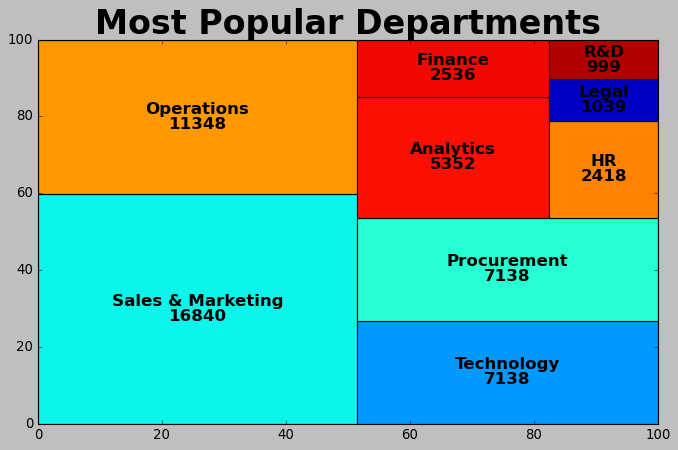

In [8]:
## Most Popular Department

department = train['department'].value_counts()

import squarify

plt.style.use('classic')
plt.figure(figsize=(10,6))
squarify.plot(department.values,label=department.index,value=department.values,text_kwargs={'fontsize':15,'fontweight':'bold'})
plt.title('Most Popular Departments',fontdict={'fontsize': 30,'fontweight':'bold'})
plt.show()


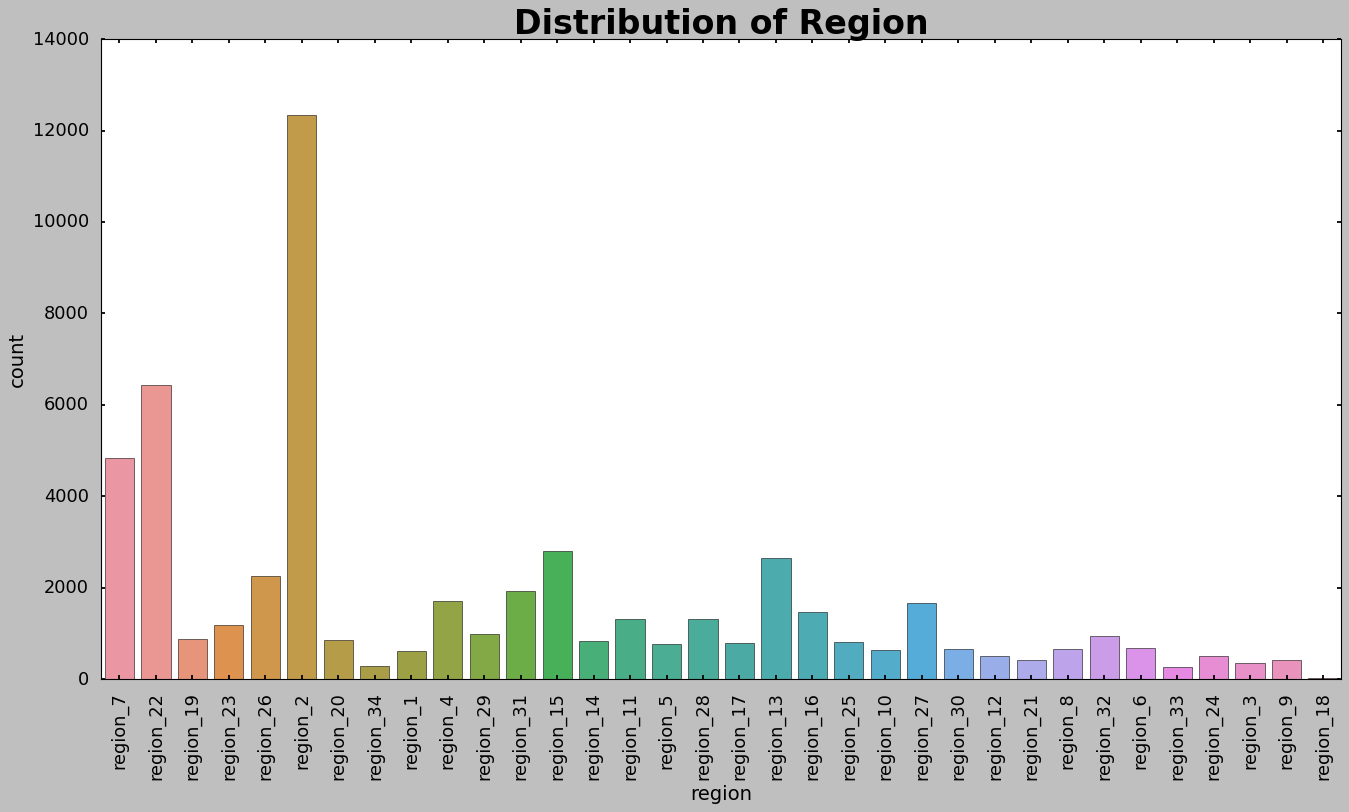

In [9]:
### Region

plt.style.use('seaborn-poster')
plt.figure(figsize=(20,10))
sns.countplot(x='region',data=train)
plt.xticks(rotation=90)
plt.title('Distribution of Region',fontsize=30,fontweight='bold')
plt.show()


C:\Users\ashis\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Age of Employees')

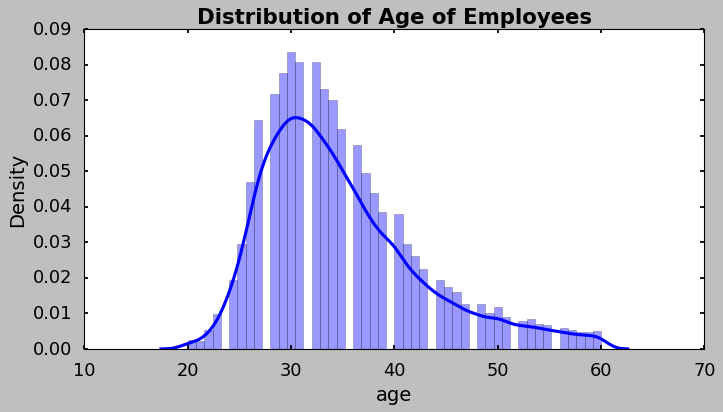

In [10]:
## distribution of age

plt.figure(figsize=(10,5))
sns.distplot(train['age'])
plt.title('Distribution of Age of Employees',fontweight='bold')

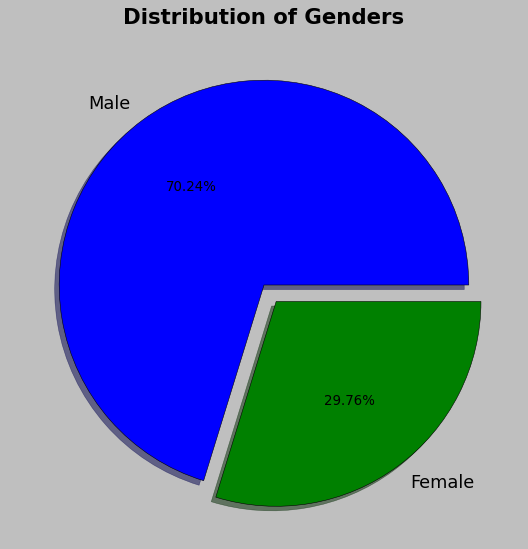

In [11]:
## Gender Percentage in Organization

plt.figure(figsize=(10,8))
plt.pie(train['gender'].value_counts(),autopct='%0.2f%%',labels=['Male','Female'],explode=[0,0.1],shadow=True)
plt.title("Distribution of Genders",fontweight='bold')
plt.show()

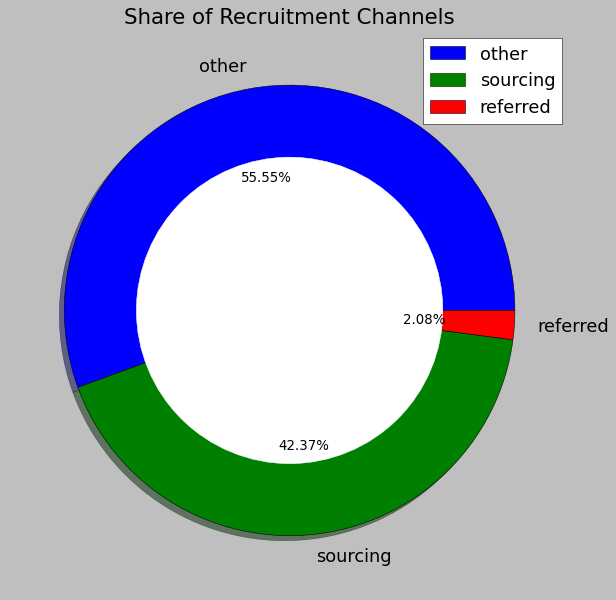

In [12]:
## recruitment Channels

rc = train['recruitment_channel'].value_counts()

plt.pie(rc.values,labels=rc.index,autopct='%0.2f%%',shadow=True,)
my_circle = plt.Circle((0,0),0.68,color='white')
fig = plt.gcf()
fig.gca().add_artist(my_circle)
plt.title('Share of Recruitment Channels')
plt.legend()
plt.show()

In [13]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


C:\Users\ashis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


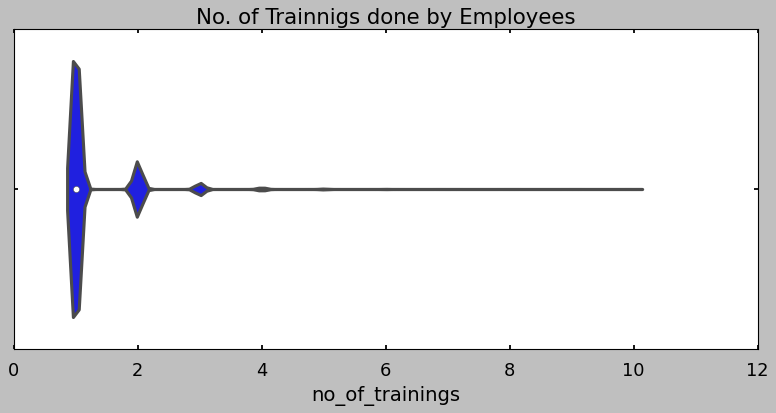

In [14]:
##trainnings

plt.figure(figsize=(12,5))
sns.violinplot(train['no_of_trainings'])
plt.title('No. of Trainnigs done by Employees')
plt.show()

C:\Users\ashis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


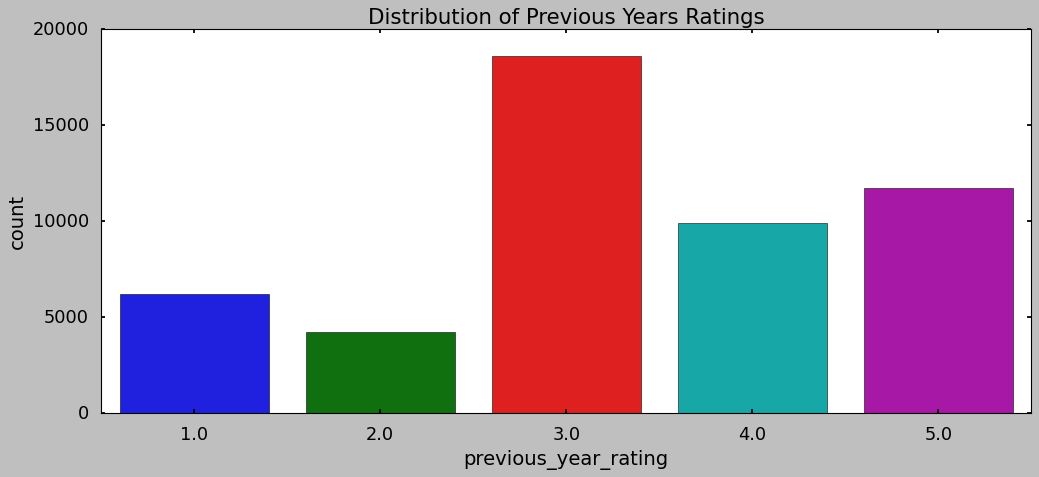

In [15]:
train['previous_year_rating'].value_counts()

plt.figure(figsize=(15,6))
sns.countplot(train['previous_year_rating'])
plt.title('Distribution of Previous Years Ratings')
plt.show()

C:\Users\ashis\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


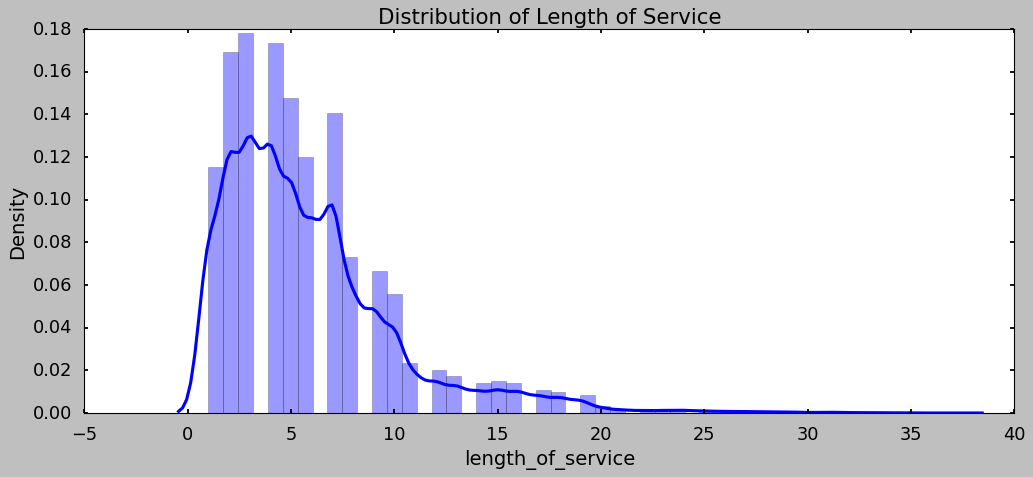

In [16]:
train['length_of_service'].value_counts()

plt.figure(figsize=(15,6))
sns.distplot(train['length_of_service'])
plt.title("Distribution of Length of Service")
plt.show()

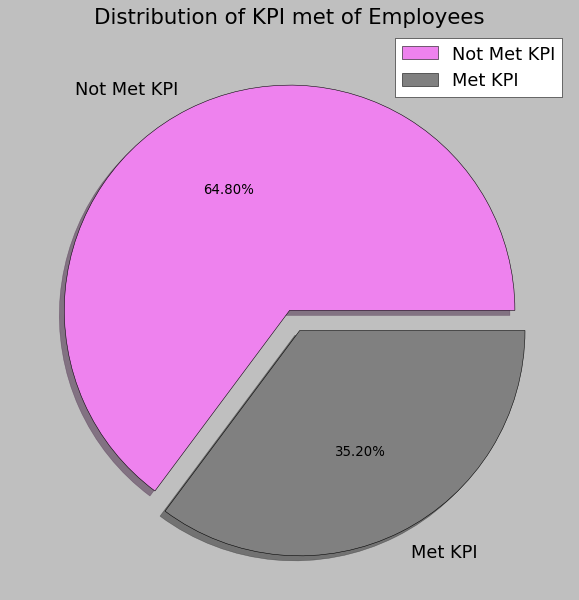

In [17]:
kpi = train['KPIs_met >80%'].value_counts()

plt.figure()
plt.pie(kpi.values,labels=['Not Met KPI','Met KPI'],explode=(0,0.1),autopct='%.2f%%',shadow=True,colors=['violet','grey'])
plt.legend()
plt.title('Distribution of KPI met of Employees')
plt.show()

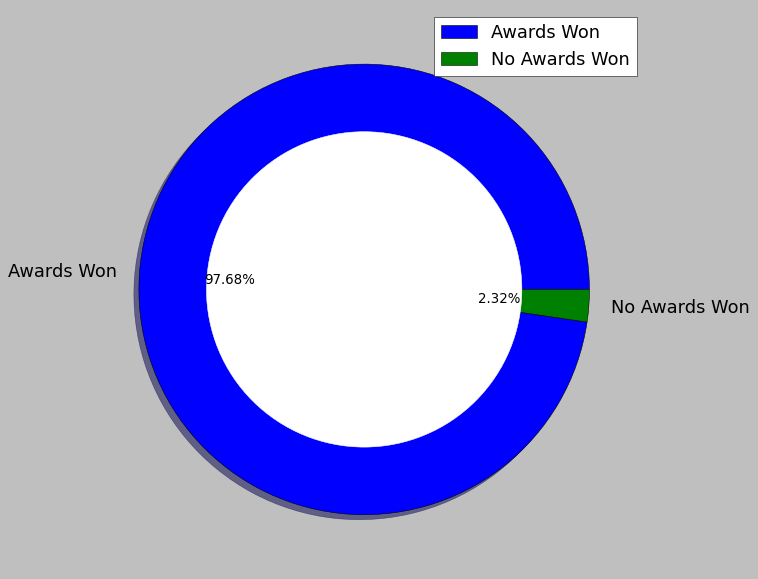

In [18]:
train['awards_won?'].value_counts()
plt.pie(train['awards_won?'].value_counts(),labels=['Awards Won','No Awards Won'],autopct='%.2f%%',shadow=True)
my_circle = plt.Circle((0,0),0.7,color = 'white')
fig = plt.gcf()
fig.gca().add_artist(my_circle)
plt.legend()
plt.show()

C:\Users\ashis\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


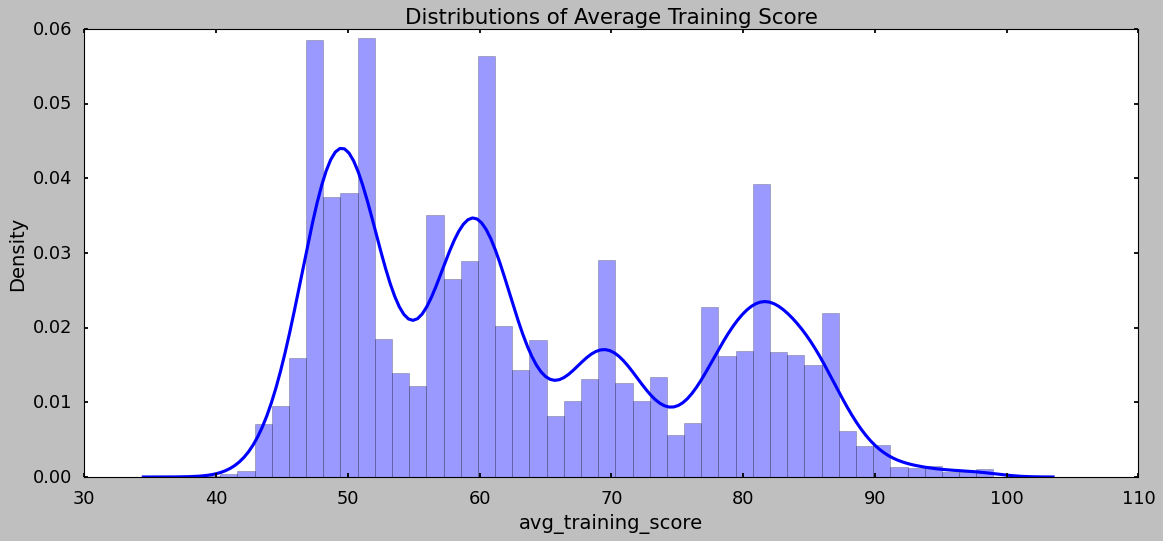

In [19]:
train['avg_training_score'].value_counts()

plt.figure(figsize=(17,7))
sns.distplot(train['avg_training_score'])
plt.title('Distributions of Average Training Score')
plt.show()

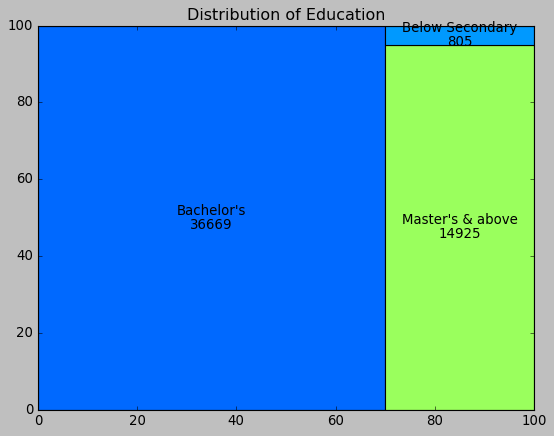

In [20]:
education = train['education'].value_counts()

plt.style.use('classic')
plt.figure(figsize=(8,6))
squarify.plot(education.values,label=education.index,value=education.values)
plt.title('Distribution of Education')
plt.show()

Text(0.5, 0, '0 -No Promotion and 1- Promotion')

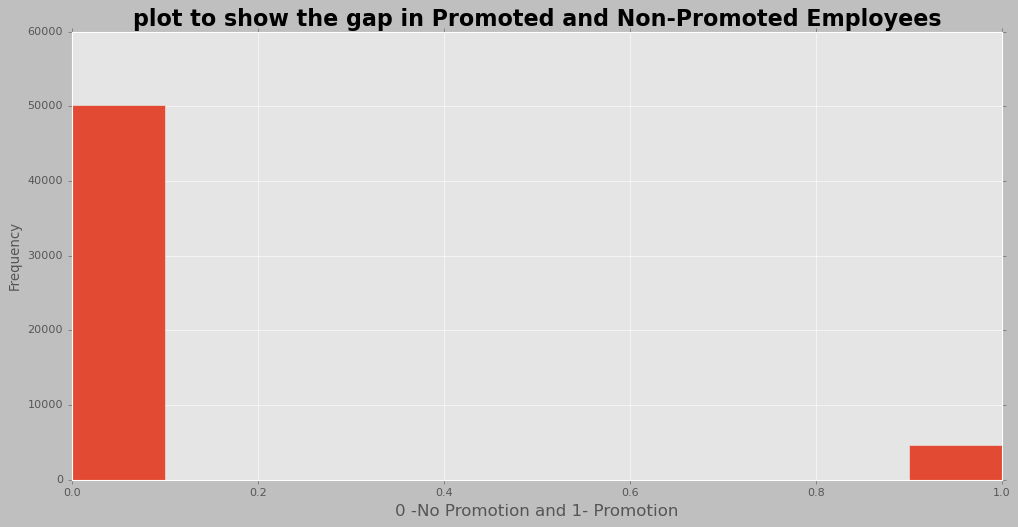

In [21]:
plt.figure(figsize=(15,7))
plt.style.use('ggplot')
train['is_promoted'].plot.hist()
plt.title('plot to show the gap in Promoted and Non-Promoted Employees', fontsize = 20,fontweight='bold')
plt.xlabel('0 -No Promotion and 1- Promotion', fontsize = 15)

### Bi-variate 

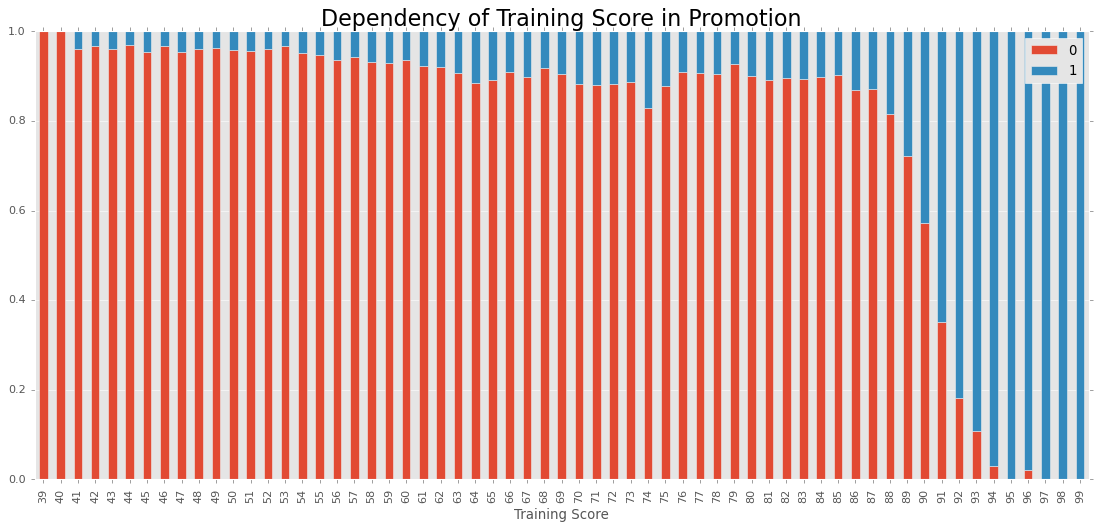

In [22]:
data = pd.crosstab(train['avg_training_score'],train['is_promoted'])
data = data.div(data.sum(1).astype(float),axis=0)
data.plot(kind='bar',stacked=True,figsize=(17,7))
plt.title('Dependency of Training Score in Promotion',fontsize=20)
plt.xlabel('Training Score')
plt.legend()
plt.show()

**As, the Training Scores Increases, the chances of Promotion Increases Highly**

In [23]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [24]:
def promotion_dependency(df,column,target):
    data = pd.crosstab(df[column],df[target])
    data = data.div(data.sum(1).astype(float),axis=0)
    data.plot(kind='bar',stacked=True,figsize=(15,5))
    plt.title(f'Dependency of {column} in Promotion')
    plt.xlabel(column)
    plt.legend()
    plt.show()
    

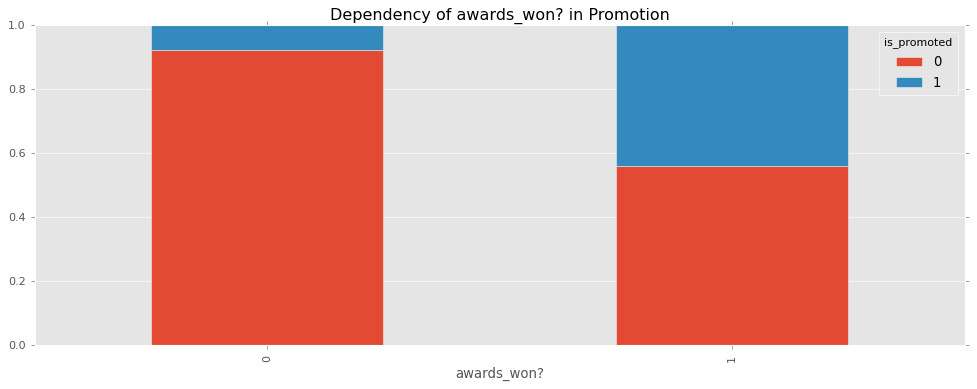

In [25]:
promotion_dependency(train,'awards_won?','is_promoted')

In [26]:
train.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [27]:
df = ['department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score']

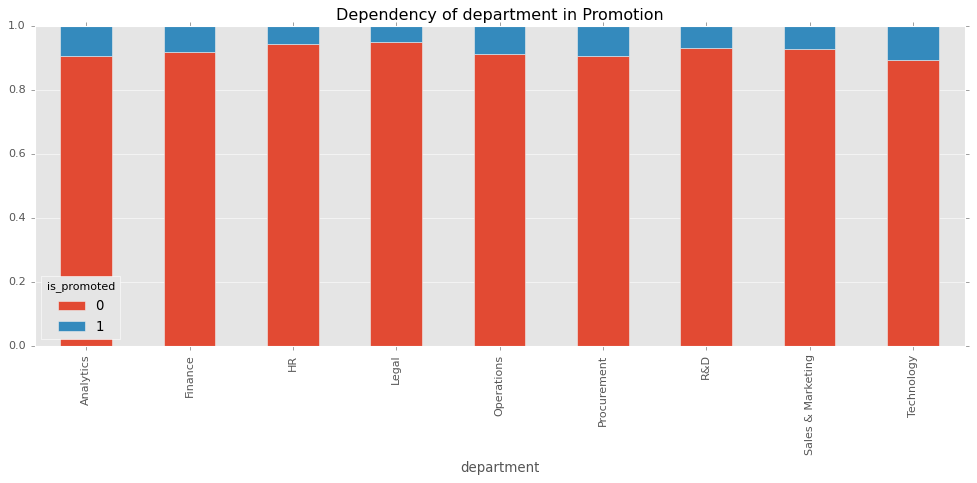

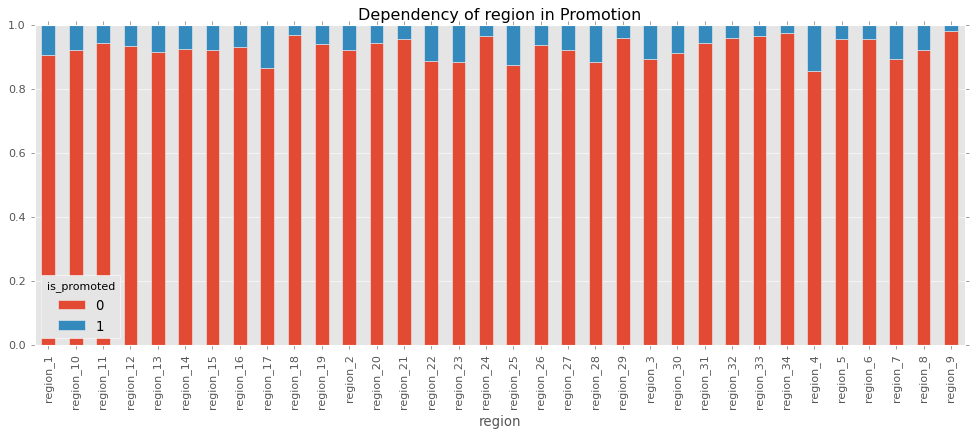

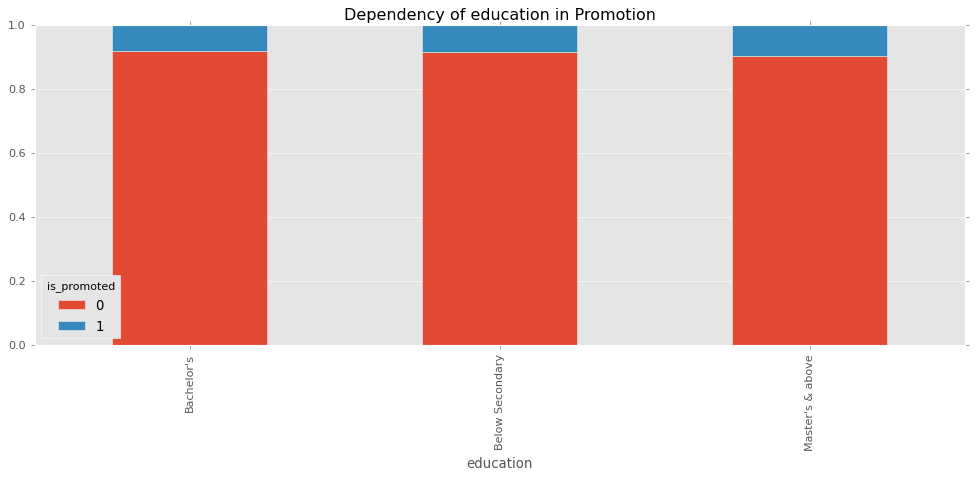

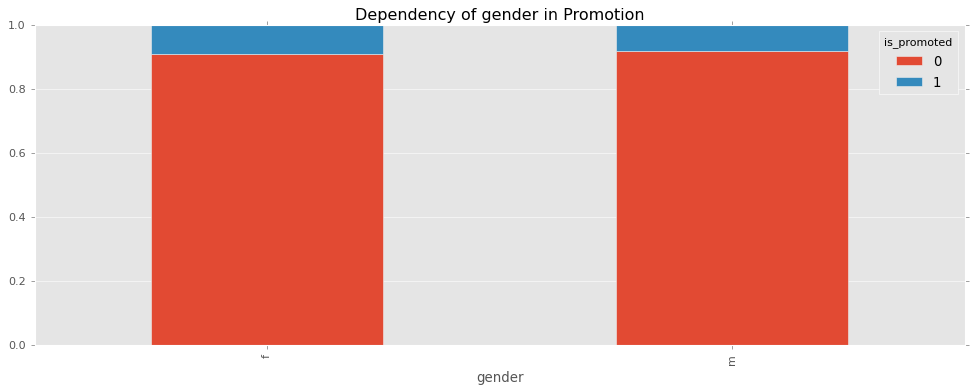

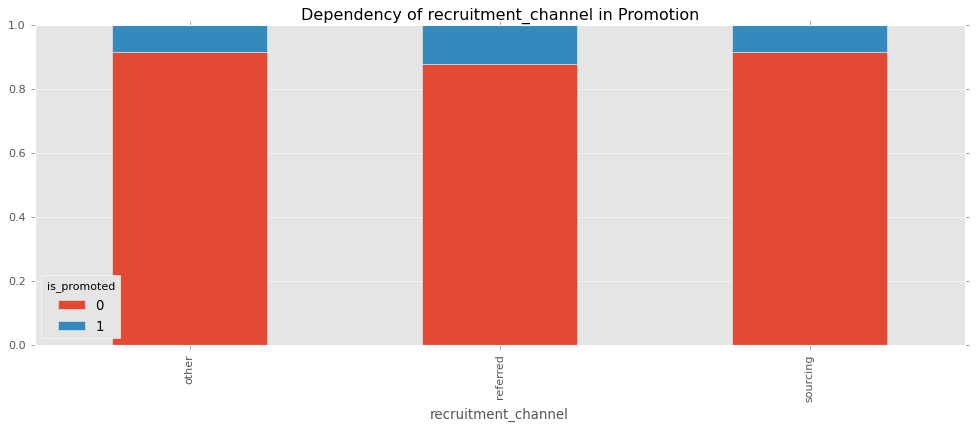

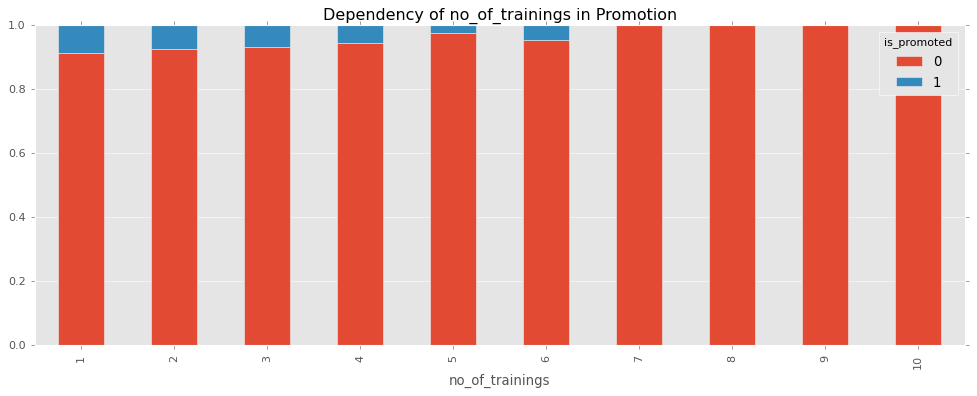

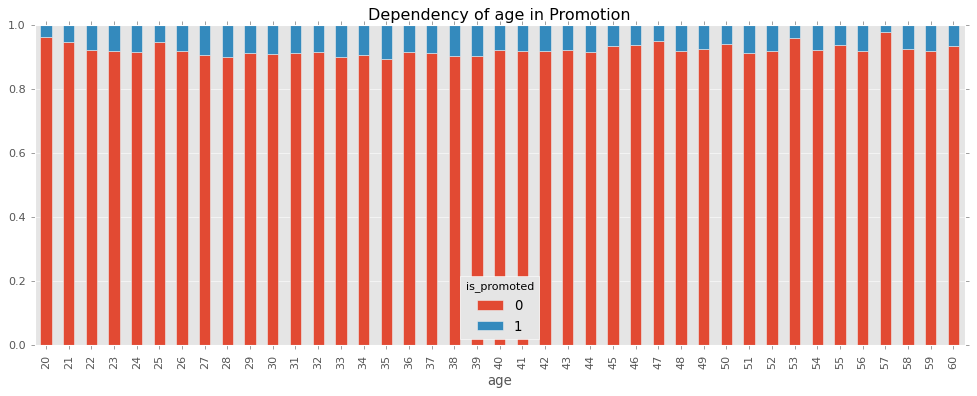

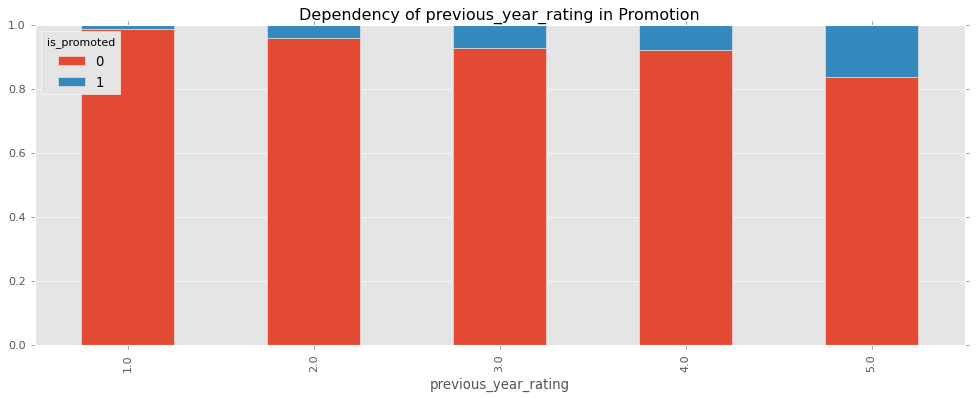

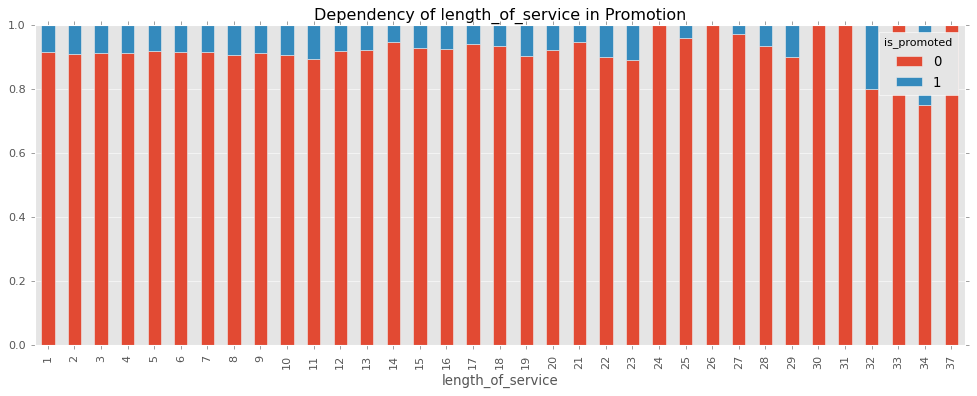

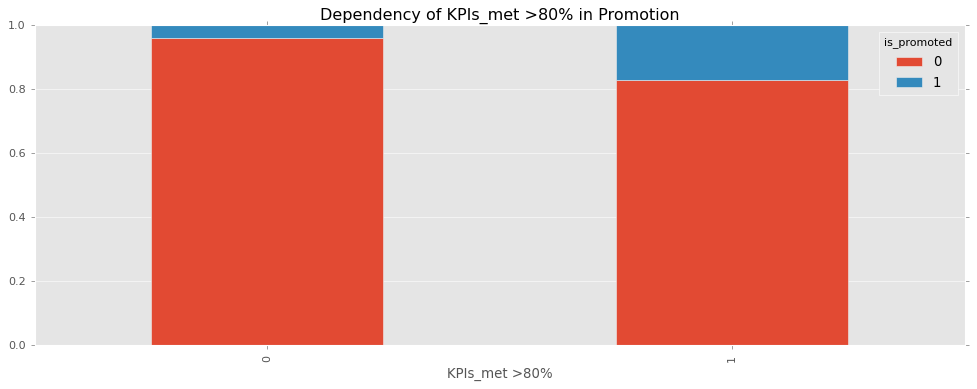

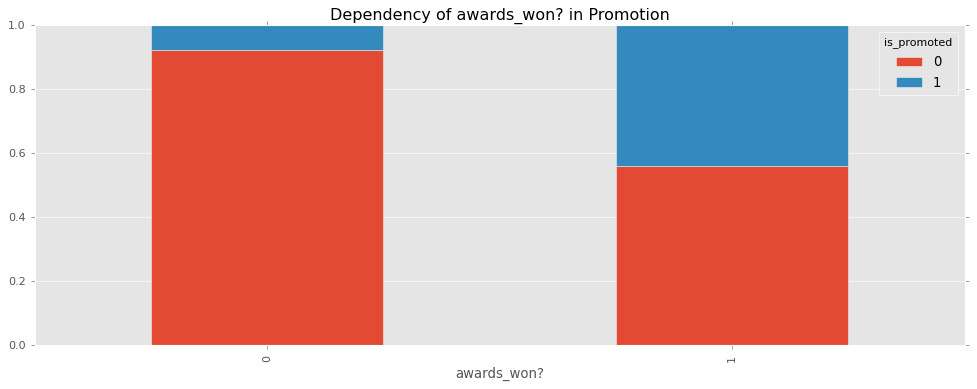

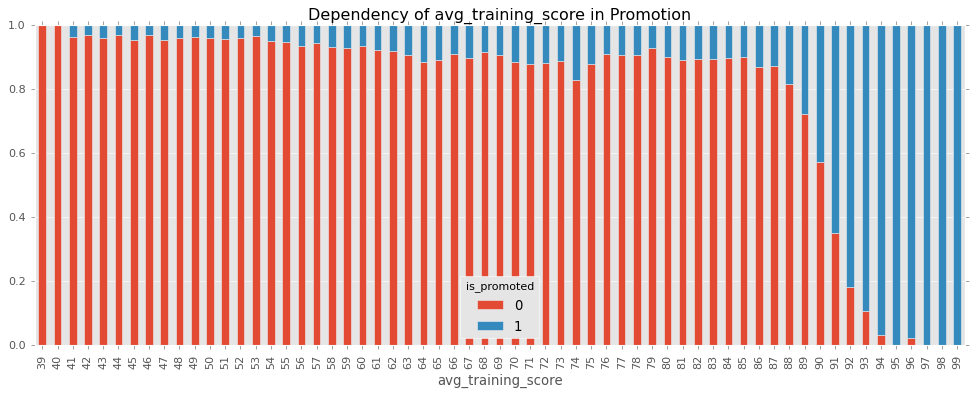

In [28]:
for cols in df:
    promotion_dependency(train,cols,'is_promoted')

## From above plots we can understand that
* As, the Training Scores Increases, the chances of Promotion Increases Highly
* There is no biasedness over regions in terms of Promotion as all the regions share promotions almost equally.
* There is a very good chance of getting promoted if the employee has won an award
* Again Having a good KPI score increases the chances of getting promoted in the company.
* Previous ratings matter a lot, if the ratings are high, the chances of being promoted in the company increases and there is completely no promotion for the employees with previous year ratings = 0
* The company promotes employees of all the ages equally even the freshers have equal share of promotion and also the senior citizen employees are getting the equal share of Promotion in the Company
* Each of the departments have equal no. of promotions showing an equal developement in each of the departments of the company.
* There is no partiality between males and females in terms of promotion
* Employees are being promoted at any Length of service, but mostly as starting phase

### Multivariate

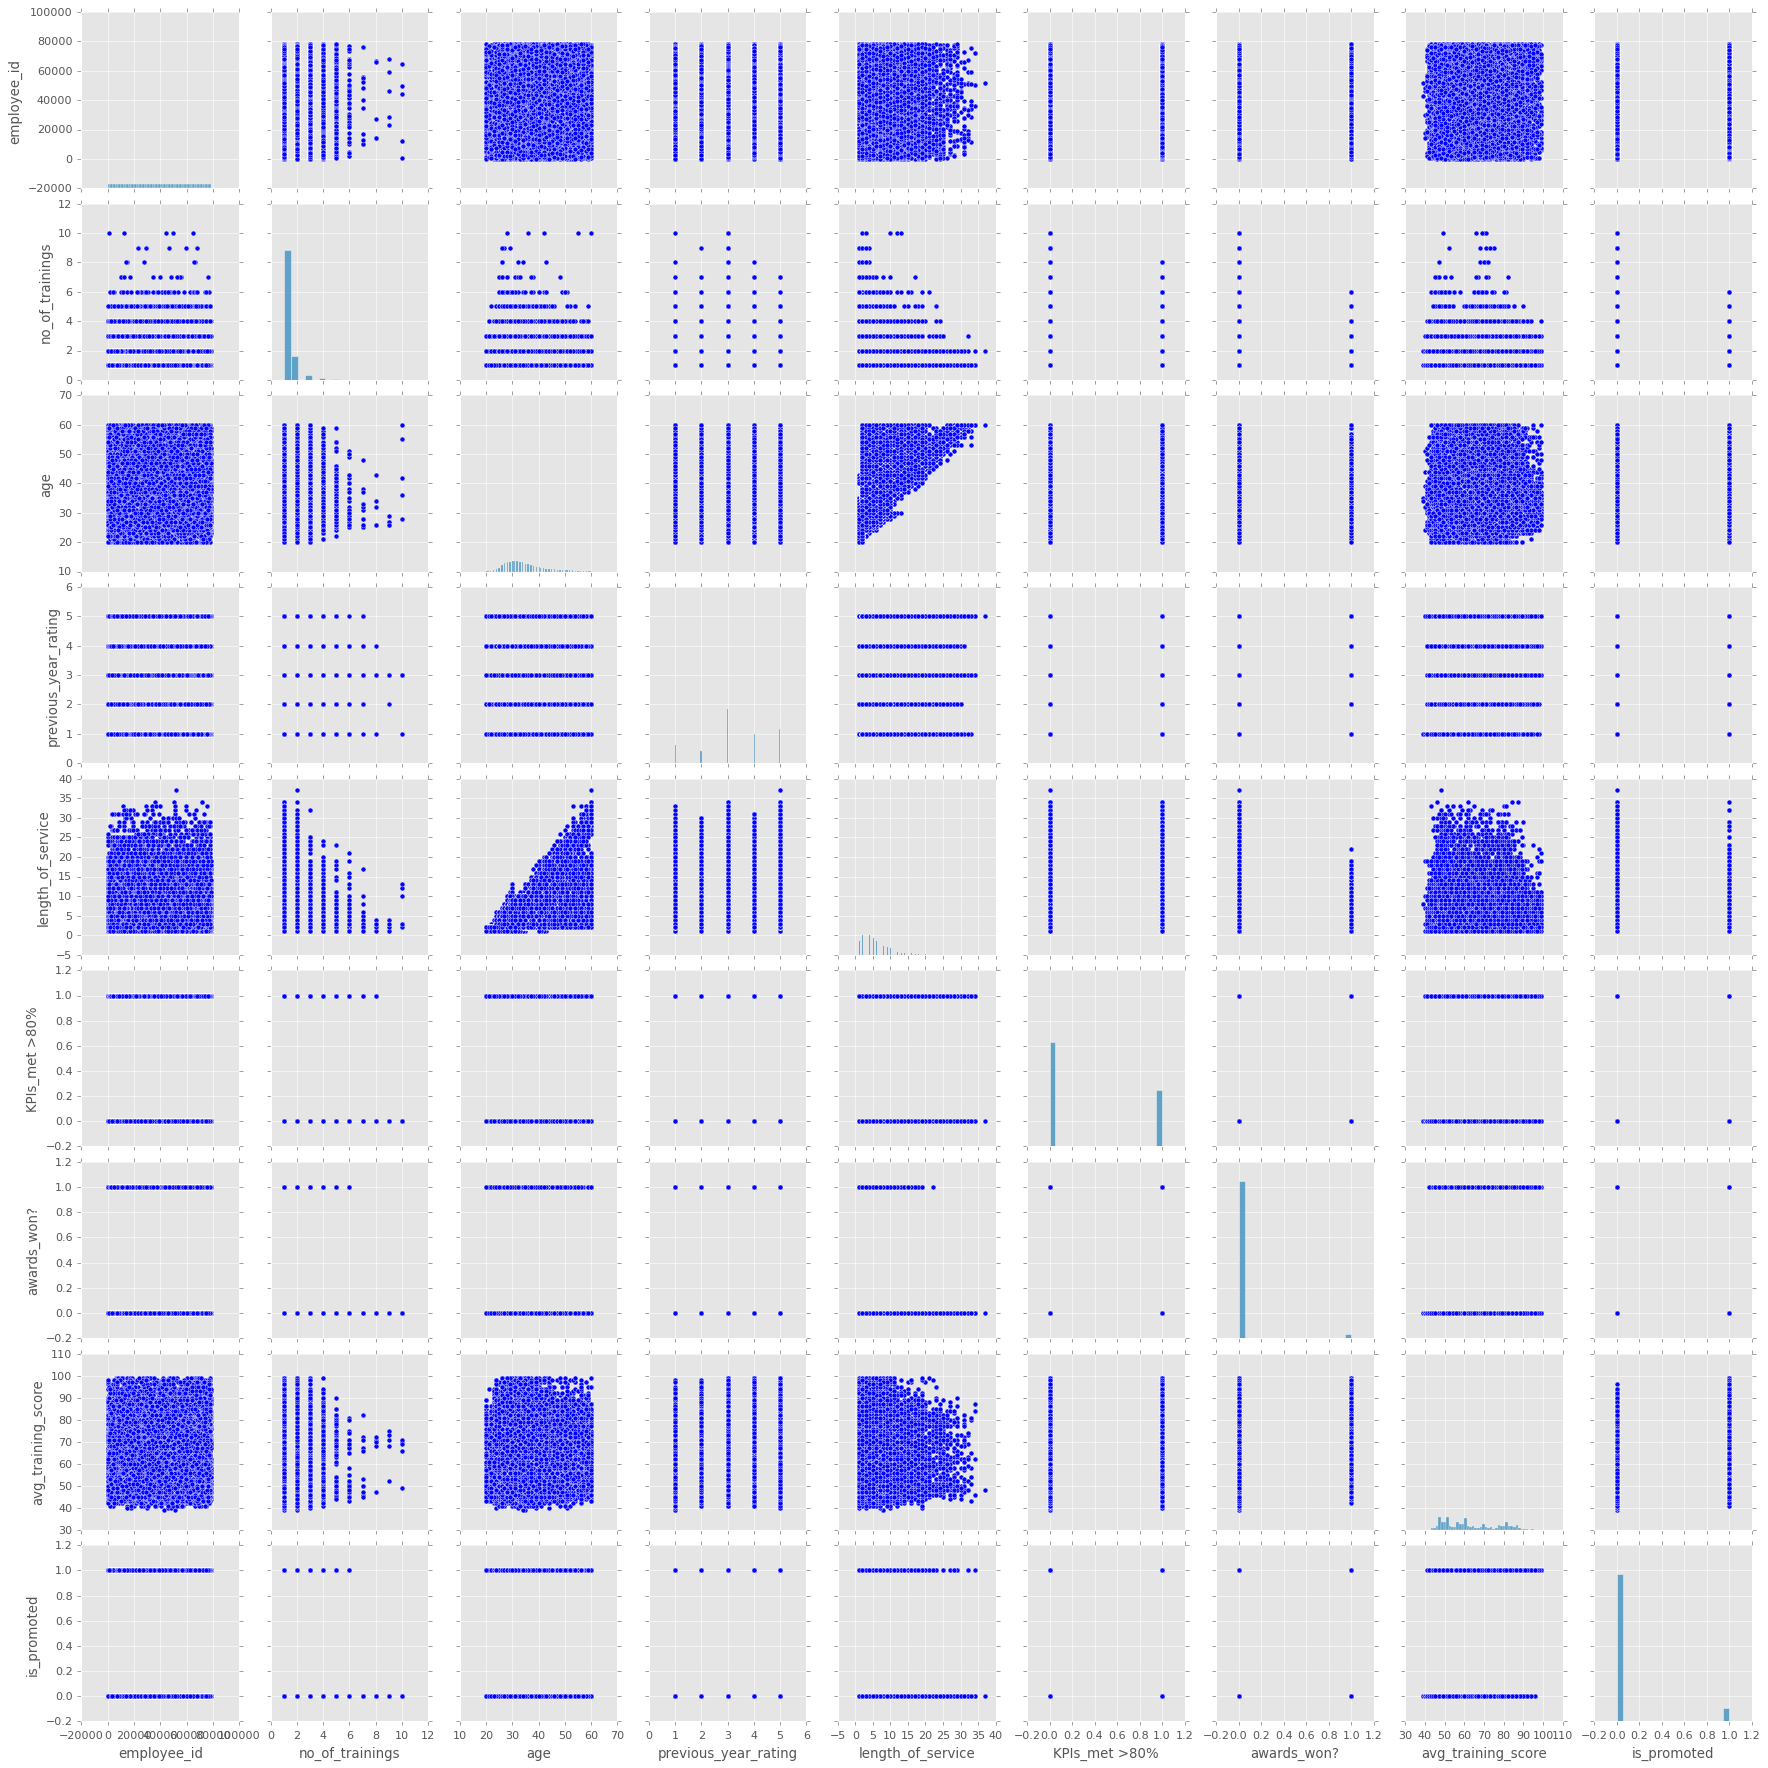

In [29]:
sns.pairplot(train)

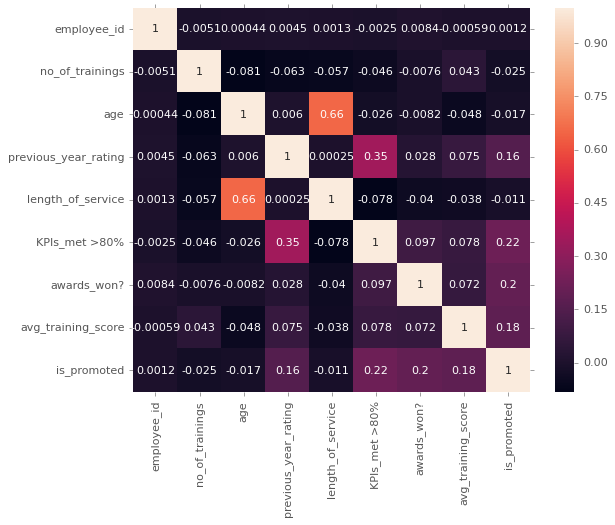

In [30]:
sns.heatmap(train.corr(),annot=True)
plt.show()

## Data Pre-Processing

### Filling Missing Values

In [31]:
train.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [32]:
train_tmp = train.copy()

In [33]:
train_tmp['education'].fillna(train_tmp['education'].mode()[0],inplace=True)
train_tmp['previous_year_rating'].fillna(1,inplace=True)

As it is will make more sence that new employees will not have their previous years rating so will would put 1 there

In [34]:
train_tmp.isna().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [35]:
train_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             54808 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  54808 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


### Split in x & y then Categorical Encoding

In [36]:
x = train_tmp.drop(['is_promoted','employee_id'],axis=1)
y = train_tmp['is_promoted']

x.shape, y.shape, x.columns

((54808, 12),
 (54808,),
 Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
        'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
        'KPIs_met >80%', 'awards_won?', 'avg_training_score'],
       dtype='object'))

In [37]:
x = pd.get_dummies(x)
x.shape

(54808, 58)

In [38]:
## Split data into training & testing sets
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((43846, 58), (10962, 58), (43846,), (10962,))

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

In [40]:
models = {"Random Forest":RandomForestClassifier(),
          "Bagging":BaggingClassifier(),
          "Extra Trees":ExtraTreesClassifier(),
          "Grad Boosting": GradientBoostingClassifier(),
          "Tree": DecisionTreeClassifier(),
          "XGB":XGBClassifier(),
          "KNN":KNeighborsClassifier()}

In [41]:
def fit_and_predict(models,x_train,x_test,y_train,y_test):
    """"
    Fits and evaluate given machine learning models.
    models: a dict of different ML models
    x_train: traing data (no labels)
    x_test: testing data (no labels)
    y_train: training labels
    y_test: testing labels
    """
    # Set random seed
    np.random.seed(42)
    
    # make a dictionary to keep model scores
    models_scores = {}
    
    # Loop through model
    for name,model in models.items():
        
        # Fit the Model
        model.fit(x_train,y_train)
        
        # Evaluate the model & append its scores in score dict
        models_scores[name] = model.score(x_test,y_test)
        
    return models_scores

In [42]:
%time
model_scores = fit_and_predict(models,x_train,x_test,y_train,y_test)
model_scores

Wall time: 0 ns


C:\Users\ashis\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:46:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


{'Random Forest': 0.9355956942163839,
 'Bagging': 0.934227330779055,
 'Extra Trees': 0.9241926655719759,
 'Grad Boosting': 0.9409779237365444,
 'Tree': 0.901021711366539,
 'XGB': 0.9414340448823207,
 'KNN': 0.9238277686553549}

In [43]:
accuracy = pd.DataFrame(model_scores,index=['accuracy'])
accuracy

,Random Forest,Bagging,Extra Trees,Grad Boosting,Tree,XGB,KNN
accuracy,0.935596,0.934227,0.924193,0.940978,0.901022,0.941434,0.923828


<AxesSubplot:>

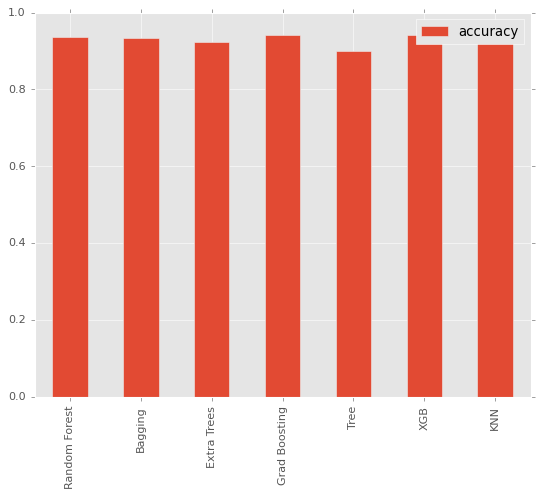

In [44]:
accuracy.T.plot.bar()

We are getting good accuracy in
* Random Forest
* Bagging
* XGB
* Grad Boosting


## Evaluate our ML models , beyond accuracy
* ROC Curve AUC Curve
* Confusion Matrix
* Classification Report
* Precision
* Recall
* F1 Score
    
.... it would be great if cross validation was used where possible. 

To make Comparisions and Evaluate our trained model, first we need to make predictions

In [45]:
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score, precision_score,recall_score
from sklearn.model_selection import cross_val_score

In [46]:
models = {"Random Forest":RandomForestClassifier(),
          "Bagging":BaggingClassifier(),
          "Grad Boosting": GradientBoostingClassifier(),
          "XGB":XGBClassifier()}

**ROC Curve**

In [47]:
def plot_cuvrves(models,x_train,y_train,x_test,y_test):
    """
    this function loop through the models and plot their ROC curves
    """
    plt.style.use('default')
    #Setup random seed
    np.random.seed(42)
    
    for name,model in models.items():
        model.fit(x_train,y_train)
        
        plot_roc_curve(model,x_test,y_test)
        plt.show()

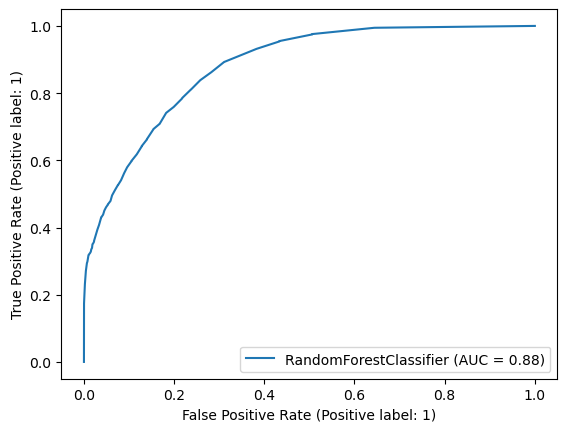

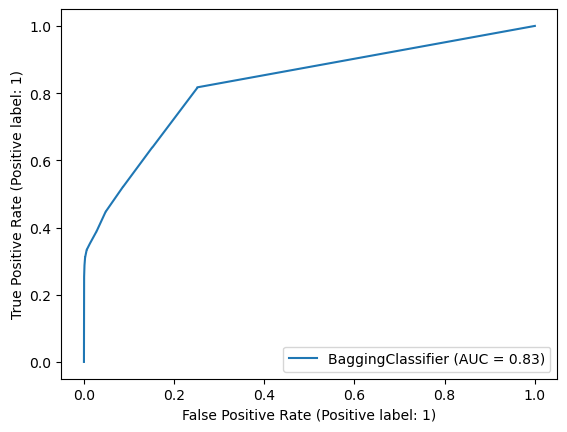

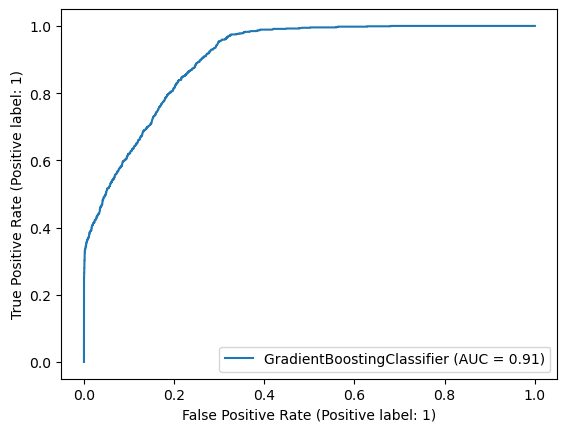

C:\Users\ashis\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:47:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


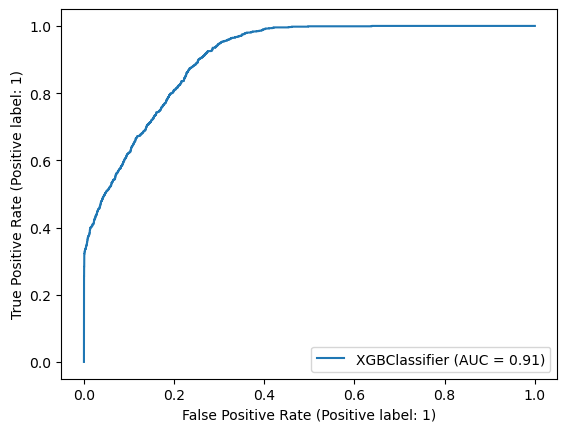

In [48]:
plot_cuvrves(models,x_train,y_train,x_test,y_test)

**Confusion Matrix**

In [54]:
## Create a function to plot Confusion matrix as well

def plot_conf_mat(models,x_train,y_train,x_test,y_test):
    """
    This Fuction will help us to plot confusion matrix for every model
    """
    
    np.random.seed(42)
    
    #Loop through models
    for name,model in models.items():
        #fit the models
        model.fit(x_train,y_train)
        
        # Predict the model
        y_preds = model.predict(x_test)
        
        # Now plot the cf matrix
        plt.figure(figsize=(3,3))
        sns.heatmap(confusion_matrix(y_test,y_preds),annot=True,cbar=False,fmt='g')
        plt.title(name)
        plt.xlabel("Predicted Labels")
        plt.ylabel("True Labels")
        plt.show()

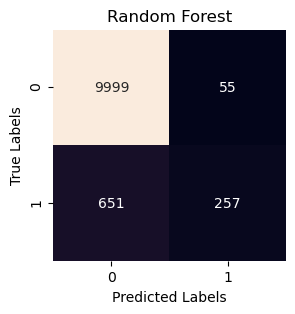

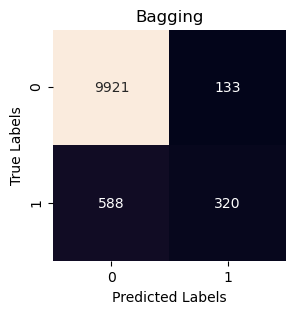

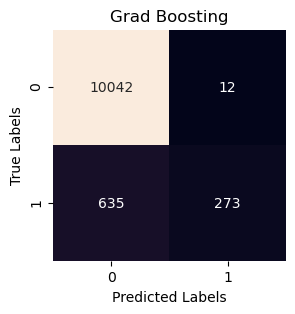

C:\Users\ashis\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:52:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


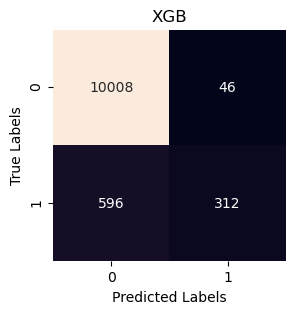

In [55]:
plot_conf_mat(models,x_train,y_train,x_test,y_test)

**Classification Report**

In [64]:
## We can write a function for classification report as well

def cls_report(models,x_train,y_train,x_test,y_test):
    """
    This Fuction will help us to write classification report
    """
    
    np.random.seed(42)
    
    #Loop through models
    for name,model in models.items():
        #fit the models
        model.fit(x_train,y_train)
        
        # Predict the model
        y_preds = model.predict(x_test)
        
        print('Classification Report for ',name)
        print(classification_report(y_test,y_preds))
        print("----"*15)
        
       

In [65]:
cls_report(models,x_train,y_train,x_test,y_test)

Classification Report for  Random Forest
              precision    recall  f1-score   support

           0       0.94      0.99      0.97     10054
           1       0.82      0.28      0.42       908

    accuracy                           0.94     10962
   macro avg       0.88      0.64      0.69     10962
weighted avg       0.93      0.94      0.92     10962

------------------------------------------------------------
Classification Report for  Bagging
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     10054
           1       0.71      0.35      0.47       908

    accuracy                           0.93     10962
   macro avg       0.83      0.67      0.72     10962
weighted avg       0.92      0.93      0.92     10962

------------------------------------------------------------
Classification Report for  Grad Boosting
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     1005

C:\Users\ashis\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:02:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Classification Report for  XGB
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     10054
           1       0.87      0.34      0.49       908

    accuracy                           0.94     10962
   macro avg       0.91      0.67      0.73     10962
weighted avg       0.94      0.94      0.93     10962

------------------------------------------------------------


### Conclusion
XGB Models is providing us the best result, we can still improve the model by hyperparameter tunning, But we are already getting nearly 95% of accuracy in it.

Now we'll predict on our `True Test Data` and save it in submission file with expected format

In [79]:
test = pd.read_csv('test.csv')
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [80]:
test.shape

(23490, 13)

In [101]:
submission = pd.DataFrame()

In [102]:
submission['employee_id'] = test['employee_id']

In [68]:
test.isna().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [69]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [70]:
### Test Data Preprocessing
test['education'].fillna(test['education'].mode()[0],inplace=True)
test['previous_year_rating'].fillna(1,inplace=True)
test.isna().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

In [71]:
test.drop('employee_id',axis=1,inplace=True)

In [73]:
test = pd.get_dummies(test)
test.shape

(23490, 58)

In [77]:
# fit & train the model then predict it on test data
xgb = XGBClassifier()
xgb.fit(x_train,y_train)
y_preds = xgb.predict(test)

C:\Users\ashis\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:27:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [78]:
y_preds

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [103]:
submission['is_promoted'] = np.array(y_preds)

In [104]:
submission.head()

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0


In [107]:
submission['is_promoted'].value_counts()

0    22741
1      749
Name: is_promoted, dtype: int64

In [108]:
submission.head()

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0


In [109]:
submission.to_csv("Final_Submission.csv",index=False)